In [1]:
# para
target_year = 2023

In [2]:
# 読み込みファイルパスの設定とimportしたいmoduleパス(pythonパス)の設定
from pathlib import Path
import os, sys

CURRENT_DIR = Path(os.getcwd())
PJ_DIR = CURRENT_DIR.parent.parent
LIB_DIR = PJ_DIR / "lib"
DATA_DIR = PJ_DIR / "data" 

sys.path.append(str(LIB_DIR))

# notebook内で利用するmoduleのimport
from lib_dataprocess import CreditbalancePl, PricelistPl, read_data, PricelistFig
import polars as pl
from datetime import date
from dateutil.relativedelta import relativedelta

In [3]:
##### reviced_pricelistの加工

In [4]:
fp = DATA_DIR/"reviced_pricelist.parquet"
df = read_data(fp)
RPL = PricelistPl(df)

RPL.with_columns_moving_zscore()
RPL.with_columns_daily_updown_rate()
RPL.df = RPL.df.filter(pl.col("date")>=date(target_year, 1, 1)).filter(pl.col("date")<=date(target_year, 12, 31))
RPL.with_columns_weekid()
RPL.df

code,date,open,high,low,close,volume,accumulated_split_rate,zs25,daily_updown_rate,weekid
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,i16
1301,2023-01-04,3815.0,3815.0,3735.0,3750.0,16800.0,1.0,0.33,-1.7,0
1301,2023-01-05,3750.0,3755.0,3725.0,3745.0,11300.0,1.0,-0.61,-0.13,0
1301,2023-01-06,3710.0,3730.0,3690.0,3720.0,15800.0,1.0,0.13,0.27,0
1301,2023-01-10,3740.0,3760.0,3710.0,3715.0,13400.0,1.0,-0.25,-0.67,1
1301,2023-01-11,3720.0,3740.0,3710.0,3725.0,7900.0,1.0,-1.12,0.13,1
…,…,…,…,…,…,…,…,…,…,…
9997,2023-12-25,598.0,600.0,597.0,599.0,299100.0,1.0,-0.45,0.17,51
9997,2023-12-26,599.0,603.0,599.0,601.0,418400.0,1.0,0.51,0.33,51
9997,2023-12-27,601.0,612.0,601.0,611.0,444200.0,1.0,0.69,1.66,51


In [5]:
##### creditbalanceの加工

In [6]:
CPL = CreditbalancePl()
CPL.with_columns_margin_volume_ratio()
delta = relativedelta(days=7)
start_date = RPL.df["date"].min() - delta
end_date = RPL.df["date"].max() - delta
CPL.df = CPL.df.filter(pl.col("date")>=start_date).filter(pl.col("date")<=end_date)
CPL.with_columns_weekid()
CPL.df

code,date,unsold_margin,purchase_margin,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio,weekid
i64,date,i64,i64,f64,f64,f64,i16
1301,2022-12-30,3200,17700,14580.0,0.22,1.21,0
1301,2023-01-06,2400,21200,15052.0,0.16,1.41,1
1301,2023-01-13,2200,20900,14264.0,0.15,1.47,2
1301,2023-01-20,4000,20200,14752.0,0.27,1.37,3
1301,2023-01-27,4400,19700,13360.0,0.33,1.47,4
…,…,…,…,…,…,…,…
9997,2023-11-24,12200,1291400,338988.0,0.04,3.81,47
9997,2023-12-01,16600,1297200,308868.0,0.05,4.2,48
9997,2023-12-08,12800,1363400,298360.0,0.04,4.57,49


In [15]:
####### revoced_pricelistにcreditbalanceをjoin
joined_df = RPL.df.join(CPL.df, on=["code", "weekid"], how="left")

In [16]:
joined_df

code,date,open,high,low,close,volume,accumulated_split_rate,zs25,daily_updown_rate,weekid,date_right,unsold_margin,purchase_margin,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,i16,date,i64,i64,f64,f64,f64
1301,2023-01-04,3815.0,3815.0,3735.0,3750.0,16800.0,1.0,0.33,-1.7,0,2022-12-30,3200,17700,14580.0,0.22,1.21
1301,2023-01-05,3750.0,3755.0,3725.0,3745.0,11300.0,1.0,-0.61,-0.13,0,2022-12-30,3200,17700,14580.0,0.22,1.21
1301,2023-01-06,3710.0,3730.0,3690.0,3720.0,15800.0,1.0,0.13,0.27,0,2022-12-30,3200,17700,14580.0,0.22,1.21
1301,2023-01-10,3740.0,3760.0,3710.0,3715.0,13400.0,1.0,-0.25,-0.67,1,2023-01-06,2400,21200,15052.0,0.16,1.41
1301,2023-01-11,3720.0,3740.0,3710.0,3725.0,7900.0,1.0,-1.12,0.13,1,2023-01-06,2400,21200,15052.0,0.16,1.41
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9997,2023-12-25,598.0,600.0,597.0,599.0,299100.0,1.0,-0.45,0.17,51,2023-12-22,126700,1470500,360220.0,0.35,4.08
9997,2023-12-26,599.0,603.0,599.0,601.0,418400.0,1.0,0.51,0.33,51,2023-12-22,126700,1470500,360220.0,0.35,4.08
9997,2023-12-27,601.0,612.0,601.0,611.0,444200.0,1.0,0.69,1.66,51,2023-12-22,126700,1470500,360220.0,0.35,4.08


In [17]:
##### いろいろfilterしてみる

In [21]:
min_zs25 = 3
min_daily_updown_rate = 5
min_unsold_margin_volume_ratio = 1
display_cols = [
    "code",
    "date",
    "zs25",
    "daily_updown_rate",
    "unsold_margin_volume_ratio"
]

In [22]:
df = joined_df.filter(pl.col("zs25")>=min_zs25)\
    .filter(pl.col("daily_updown_rate")>=min_daily_updown_rate)\
    .filter(pl.col("unsold_margin_volume_ratio")>=min_unsold_margin_volume_ratio)
df = df.drop_nulls()
df.select(display_cols)

code,date,zs25,daily_updown_rate,unsold_margin_volume_ratio
i64,date,f64,f64,f64
1418,2023-04-17,4.5,26.11,1.21
1418,2023-07-12,3.52,5.29,7.94
1418,2023-10-12,4.54,7.88,8.89
1882,2023-02-28,3.78,6.37,1.32
1888,2023-03-03,3.12,6.18,2.32
…,…,…,…,…
9930,2023-02-13,4.35,12.45,1.81
9930,2023-03-06,4.49,9.71,1.7
9930,2023-04-21,3.05,5.24,1.22


In [ ]:
##### chart

In [25]:
code = 1888
dt = date(2023, 3, 3)
weeks = 4

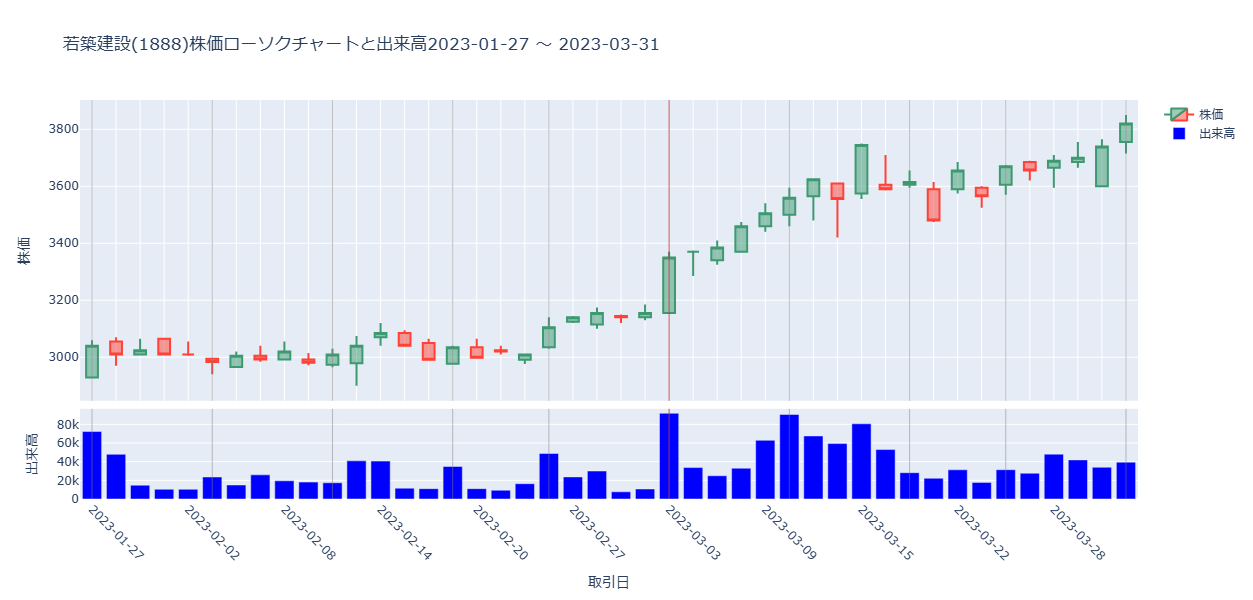

In [26]:
# 日足チャート
start_date = dt - relativedelta(days = 7 * (weeks + 1))
end_date = dt + relativedelta(days = 7 * weeks)
PFIG = PricelistFig(code, start_date=start_date, end_date=end_date)

# 週末にvline
df = read_data(fp)
RPL = PricelistPl(df)
df = RPL.df
df = df.filter(pl.col("code")==code)\
.filter(pl.col("date")>=start_date)\
.filter(pl.col("date")<=end_date)
RPL = PricelistPl(df)
RPL.with_columns_weekid()
pdf = RPL.df
pdf = pdf.group_by(["weekid"]).agg([
    pl.col("date").last()
]).sort(by=["weekid"])
vline_dates = pdf["date"].to_list()
#vline_dates.remove(dt)
for d in vline_dates:
    PFIG.add_vline(d)

# 該当日にvline
PFIG.add_vline(dt, color="red")

PFIG.fig.show()

In [ ]:
dt

In [ ]:
vline_dates